# Spectral analysis of 5000 movies network
### by Macko Vladimir, Novakovic Milica, Pavué Clément, Roussaky Mehdi

## Data Expoitation and Evaluation

In [1]:
#classical inputs
import sys, os, pathlib

import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition
from scipy import sparse, stats, spatial
import scipy.sparse.linalg

#setting the path to folder with modules
sys.path.insert(0, str(pathlib.Path(os.getcwd()).parents[0] / 'python'))
from Load_Datasets import *

#Loading information about movies (transforming JSON files into pandas frame)
FileAddress_movies ="../Datasets/tmdb_5000_movies.csv"
FileAddress_credits="../Datasets/tmdb_5000_credits.csv"

In [2]:
#Loading information about movies
Movies = Load_Datasets(FileAddress_movies,FileAddress_credits)

Drops = ['homepage','status','id']
for drop in Drops:
    Movies = Movies.drop(drop, 1)

#pandas entries contain string arrays from which can be easily converted to lists using string.split(",")
#new datafile is generated
Movies.to_csv("../Datasets/Transformed.csv")

In [4]:
Drops = ['release_date','runtime','budget','popularity', "original_language", "tagline", 'spoken_languages', 'production_countries']
for drop in Drops:
    Movies = Movies.drop(drop, 1)
list(Movies)

['genres',
 'keywords',
 'original_title',
 'overview',
 'production_companies',
 'revenue',
 'vote_average',
 'vote_count',
 'genres_id',
 'keywords_id',
 'production_companies_id',
 'actors',
 'actors_id',
 'actor_gender',
 'crew_names',
 'crew_names_id',
 'crew_jobs',
 'crew_departments',
 'primary_genre',
 'primary_production_company',
 'prime_actors',
 'prime_crew_names',
 'prime_keywords']

In [3]:
Movies['actors']               = Movies['actors'].apply(lambda x: x.replace(" ", "_"))
Movies['keywords']             = Movies['keywords'].apply(lambda x: x.replace(" ", "_"))
Movies['crew_names']           = Movies['crew_names'].apply(lambda x: x.replace(" ", "_"))
Movies['production_companies'] = Movies['production_companies'].apply(lambda x: x.replace(" ", "_"))
#from multiprocessing import Pool
import multiprocessing
from multiprocessing import Pool, cpu_count
import functools

##warning global viariables in use
Entries = 'blah'

def GetSingleEntryFrame(Comparator):
    def Transformer(Entrys):
        for Entry in Entrys.split(","):
            if Entry==Comparator:
                return 1
        return 0
    SingleEntryFrame = pd.DataFrame()
    SingleEntryFrame[Comparator]          = Movies[Entries].apply(Transformer)
    Treshold = 2
    if Entries == 'keywords' or Entries == 'production_companies':
        Treshold == 2
    if SingleEntryFrame[Comparator].sum() <Treshold:
        return pd.DataFrame()
    return SingleEntryFrame

def join_dfs(ldf, rdf):
    return ldf.join(rdf, how='inner')

def applyParallel(df, func):
    multiprocessing
    with Pool(cpu_count()) as p:  
        ret_list = p.map(func, [Comparator for Comparator in GetEntryList()])
     
    print("Merging Started")
    Unified = pd.DataFrame()
    for df in ret_list:
        Unified[df.columns] = df[df.columns]
    return Unified

def GetEntryList():
    AllEntrys=""
    for Entrys in Movies[Entries]:
        AllEntrys+=Entrys
    EntryList =list(set(AllEntrys.split(",")))
    return EntryList

def TransformEntrys(Movies):
    EntrysFrame = applyParallel(Movies,GetSingleEntryFrame)
    return EntrysFrame 

def ProcessCategorical(feature):
    global Entries 
    Entries = feature
    Frame=TransformEntrys(Movies)
    Frame.to_csv("../Datasets/"+str(feature)+".csv")
    print(Frame) 
    return Frame

Frames = []
for feature in ['prime_actors','prime_keywords','prime_crew_names']:
    Frames.append(((ProcessCategorical(feature)).fillna(0)))
     
    
print("DONE")

Merging Started
                                           Matt Malloy  Paul Rudd  \
title                                                               
#Horror                                              0          0   
(500) Days of Summer                                 0          0   
10 Cloverfield Lane                                  0          0   
10 Days in a Madhouse                                0          0   
10 Things I Hate About You                           0          0   
102 Dalmatians                                       0          0   
10th & Wolf                                          0          0   
11:14                                                0          0   
12 Angry Men                                         0          0   
12 Rounds                                            0          0   
12 Years a Slave                                     0          0   
127 Hours                                            0          0   
13 Going on 30    

Merging Started
                                           west virginia  gondola  \
title                                                               
#Horror                                                0        0   
(500) Days of Summer                                   0        0   
10 Cloverfield Lane                                    0        0   
10 Days in a Madhouse                                  0        0   
10 Things I Hate About You                             0        0   
102 Dalmatians                                         0        0   
10th & Wolf                                            0        0   
11:14                                                  0        0   
12 Angry Men                                           0        0   
12 Rounds                                              0        0   
12 Years a Slave                                       0        0   
127 Hours                                              0        0   
13 Going on 30    

Merging Started
                                           Paul Rudd  Aravind Jayaraman  \
title                                                                     
#Horror                                            0                  0   
(500) Days of Summer                               0                  0   
10 Cloverfield Lane                                0                  0   
10 Days in a Madhouse                              0                  0   
10 Things I Hate About You                         0                  0   
102 Dalmatians                                     0                  0   
10th & Wolf                                        0                  0   
11:14                                              0                  0   
12 Angry Men                                       0                  0   
12 Rounds                                          0                  0   
12 Years a Slave                                   0                  0   
127 Hours

In [4]:
AllIndex = Frames[0].index.values
CleanedFrames=[]
CleanedFrames.append( Frames[0][(Frames[0].T != 0).any()] )
CleanedFrames.append( Frames[1][(Frames[1].T != 0).any()] )
CleanedFrames.append( Frames[2][(Frames[2].T != 0).any()] )

DropLines0 = (list(set(AllIndex) - set(CleanedFrames[0].index.values)))
DropLines1 = (list(set(AllIndex) - set(CleanedFrames[1].index.values)))
DropLines2 = (list(set(AllIndex) - set(CleanedFrames[2].index.values)))

DropLines = set(DropLines0 + DropLines1 + DropLines2)
Remainers = list(set(AllIndex) - set(DropLines))
print(len(Remainers)/len(Frames[0]))



0.8014140153878145


In [5]:
newFrames=[]
for i in range(len(Frames)):
    newFrames.append(Frames[i].drop(list(DropLines)))

In [6]:
all_distances=[]
for Frame in newFrames:
    all_distances.append(np.nan_to_num(scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Frame, metric='cosine')))) 

In [7]:
GrandFinal = pd.DataFrame()
for col in ['revenue', 'vote_average',  'vote_count']:
    GrandFinal[col]      = Movies[col] 
newGrandFinal = GrandFinal.drop(list(DropLines)) 
newGrandFinal -= newGrandFinal.mean(axis=0)
newGrandFinal /= newGrandFinal.std(axis=0)
Grand_distances = np.nan_to_num(scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(newGrandFinal, metric='cosine')))

In [8]:
GrandFinal.to_csv("../Datasets/GrandFinalle.csv") 

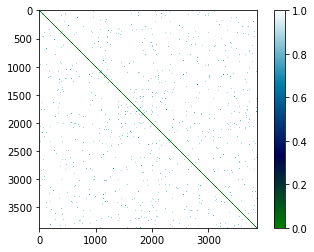

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(all_distances[0], interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

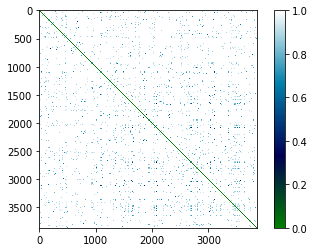

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(all_distances[1], interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

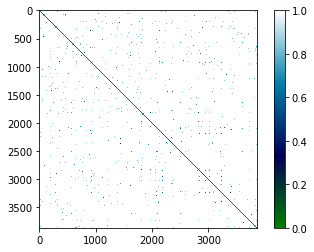

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(all_distances[2], interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

In [9]:
CatDistances = all_distances[0] + all_distances[1] + all_distances[2]

In [10]:
plt.rcParams['figure.figsize'] = (17, 9)

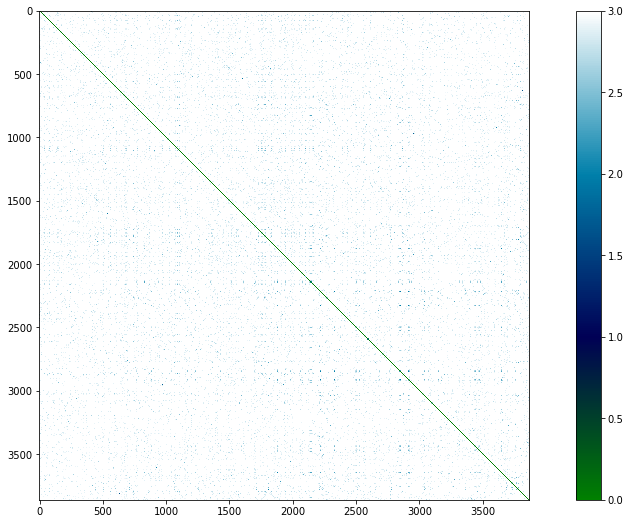

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(CatDistances, interpolation='nearest',cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

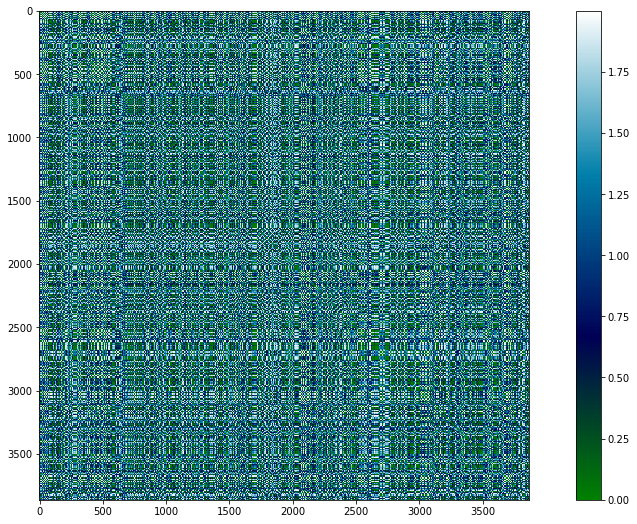

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(Grand_distances, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

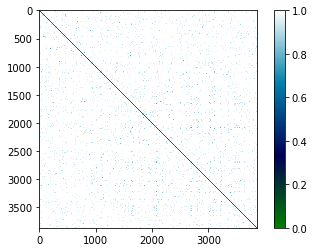

In [17]:
All = (CatDistances)/3
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.rcParams['figure.figsize'] = (17, 9)
plt.imshow(All, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.show()


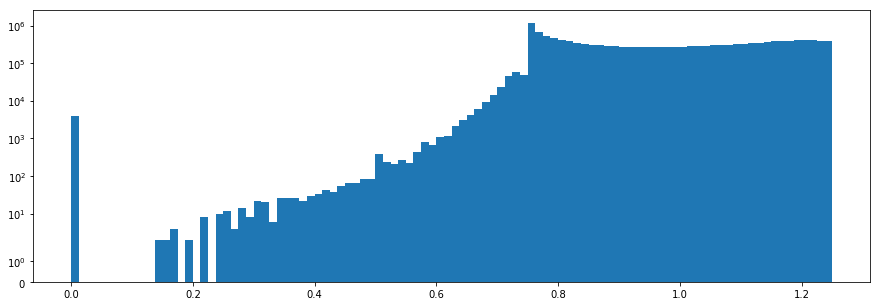

In [18]:
%matplotlib inline
fig, axes = plt.subplots(figsize=(15, 5))

# Budget is plotted in log scale on y axis
axes.set(yscale="symlog")
plt.rcParams['figure.figsize'] = (17, 9)
plt.hist(All.reshape(-1), bins=100);

In [19]:
distances =All
kernel_width = distances.mean()
print(kernel_width)
#getting the weights using given kernel
weights = np.zeros((len(distances),len(distances)))
for i in range(0, len(distances)):
    for j in range(0,len(distances)):
        weights[i][j]=  np.exp((-distances[i][j]*distances[i][j])/(kernel_width*kernel_width))

        
        
#weights = np.asarray([[ np.exp(-(d**2)/(kernel_width**2)) for d in line] for line in distances]) #?


#setting diagonal terms to zeros
np.fill_diagonal(weights, 0)

0.979723575488


In [18]:
GrandFinal = GrandFinal.fillna(0)
features_pca = decomposition.PCA(n_components=100).fit_transform(All)

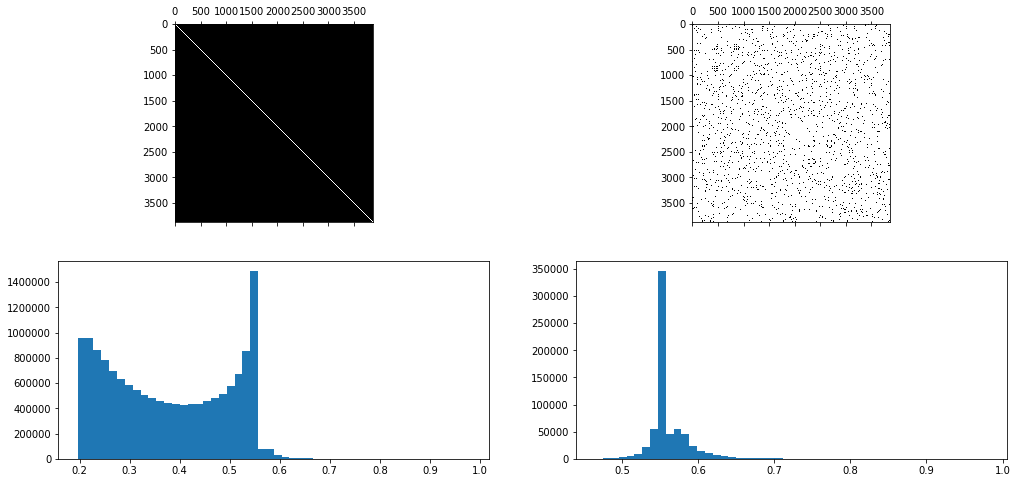

In [21]:
fix, axes = plt.subplots(2, 2, figsize=(17, 8))
def plot(weights, axes):
    axes[0].spy(weights)
    axes[1].hist(weights[weights > 0].reshape(-1), bins=50);
plot(weights, axes[:, 0])

NEIGHBORS = 4000

newweights = np.zeros((len(distances),len(distances)))

#dropping edges while keeping only 100 strongest
#dropping per edge side to avoid disconected nodes
counter=0
for line in weights:
    ordered_indices = np.argsort(line)[len(line)-NEIGHBORS:]#[:len(line)-NEIGHBORS]
    for i in ordered_indices:
        newweights[counter][i] = line[i]
        newweights[i][counter] = line[i]
        line[i]=0
    counter+=1    

weights = newweights
#symetrizing weights matrix, needed due to case when 
#edge between nodes A and B is in 100 strongest edges of A but not in 100 stronges edges of B
bigger = weights.transpose() > weights
weights = weights - weights*bigger + weights.transpose()*bigger
       

plot(weights, axes[:, 1])

In [19]:
distances =scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(features_pca, metric='cosine') )

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(distances, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

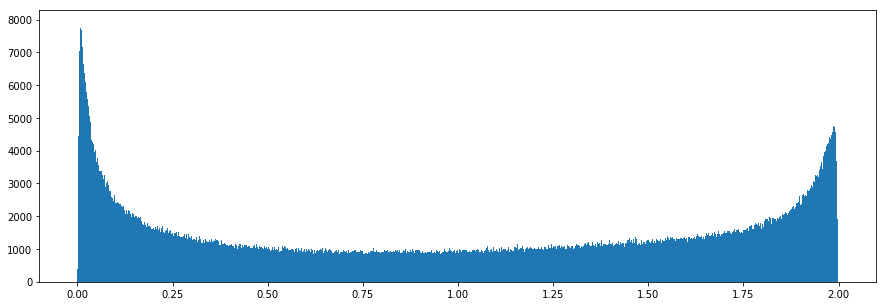

In [24]:
fig, axes = plt.subplots(figsize=(15, 5))

# Budget is plotted in log scale on y axis
#axes.set(yscale="symlog")
plt.hist(distances.reshape(-1), bins=10000);

0.977759251972


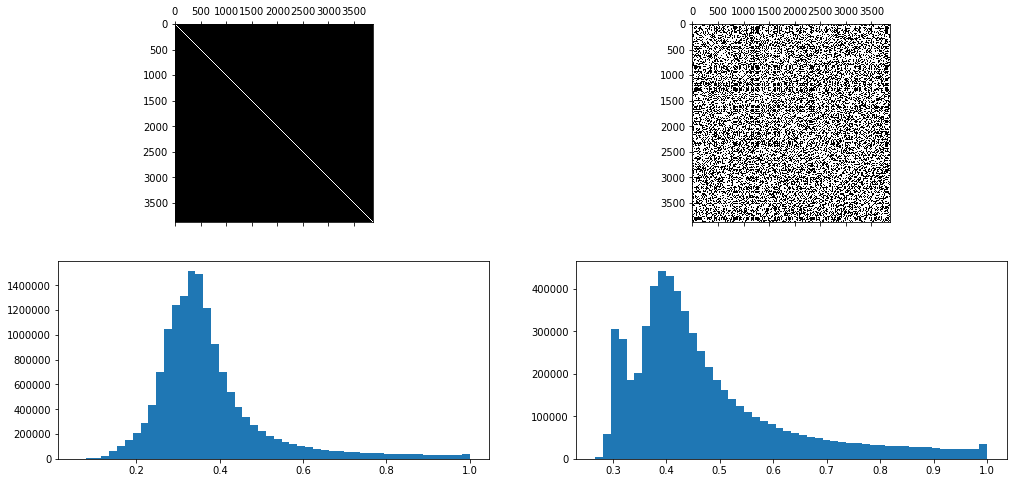

In [20]:
%matplotlib inline
from GetWeights import *
NEIGHBORS = 5000

       
weights = GetWeights(distances,NEIGHBORS)


In [ ]:
## first part / milestones 3 & 4

In [10]:
## edited text from proposal

Since many movie attributes are not numerical, it is necessary to calculate overlap matrix for each movie attribute separately using a feature-specific overlap calculating function. Generated series of overlap matrices will be combined into one single weight matrix. However, the choice of combining method is arbitrary. Therefore, several examples of combining method are considered. 

In [ ]:
## second part / milestones 5 & 6

In [ ]:
## edited text from proposal

Once the graph is created, e.g. the weight matrix is established, it will be sparced using k-nearest neighbors and Laplacian matrix and its corresponding eigendecomposition will be calculated. The constructed graph is visualized using PCA and using Laplacian eigendecomposition in order to observe clusters of similarity in terms of genres, popularity etc. Furthermore, studying connectivity of the graph and degrees of nodes it is possible to estimate how
mainstream a movie is. Also, a study of choice of a category representative may be conducted choosing a movie which represents the cluster in the best way. For example, if k-nearest neighbors method is utilized with k equal to 1, we can obtain disconnected graph with clusters of movies, and the node to which the most of the edges oriented  point, is appointed as a category representative. Using a category representative allows a viewer to get an impression on entire category based on watching only a single movie.

In [8]:
#
Movies.reduce()

AttributeError: 'DataFrame' object has no attribute 'reduce'

## Conclusion

In [ ]:
# Your code here.
genres = preprocessing.LabelEncoder().fit_transform(tracks['genre'])

holder = []
Weights=weights[:]
for i in range(0,len(Weights)):
    if genres[i]==1:
        holder.append(Weights[i])
    else:
        holder.insert(0, Weights[i])
        
WEIGHTS = []
holder=np.asarray(holder).T
for i in range(0,len(holder)):
    if genres[i]==1:
        WEIGHTS.append(holder[i])
    else:
        WEIGHTS.insert(0, holder[i])

plt.spy(WEIGHTS, markersize=1)